<a href="https://colab.research.google.com/github/MAYANK12-WQ/futuristic-nlp-sentiment-analyzer/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install Dependencies

In [1]:
# 🧠 Core NLP
!pip install nltk spacy --quiet
!python -m nltk.downloader punkt stopwords
!python -m spacy download en_core_web_sm

# 🔥 Transformers
!pip install transformers datasets --quiet

# 💬 Topic modeling
!pip install bertopic umap-learn --quiet

# 📊 Plotting & Dashboards
!pip install plotly wordcloud pyvis matplotlib seaborn --quiet


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━

# ✅ STEP 2: Load & Explore Real NLP Dataset (IMDb or TweetEval)

In [2]:
from datasets import load_dataset

# 📥 Load the IMDb dataset (train + test)
dataset = load_dataset("imdb")

# Preview
print("🔍 Sample example:")
print(dataset['train'][0])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

🔍 Sample example:
{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes 

# ✅ Step 3: Preprocess Text (Clean + Lemmatize + Tokenize)

In [9]:
# ✅ Balanced sampling from both classes (0 = neg, 1 = pos)
neg_samples = [sample for sample in dataset['train'] if sample['label'] == 0][:500]
pos_samples = [sample for sample in dataset['train'] if sample['label'] == 1][:500]

# ✅ Combine + shuffle
balanced_samples = neg_samples + pos_samples
import random
random.shuffle(balanced_samples)

# ✅ Preprocess again
cleaned_texts = [preprocess(sample['text']) for sample in balanced_samples]
labels = [sample['label'] for sample in balanced_samples]


# ✅ Step 4: Convert Text to Vectors using TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# ⚙️ TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# 🔁 Convert cleaned text to vectors
X = vectorizer.fit_transform(cleaned_texts).toarray()
y = labels

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Preview shape
print("✅ TF-IDF Vector shape:", X_train.shape)


✅ TF-IDF Vector shape: (800, 5000)


# 🚀 Step 5: Train a Classifier (Logistic Regression)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ✅ Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 🔮 Predict
y_pred = model.predict(X_test)

# 📊 Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.88

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.88       102
           1       0.84      0.94      0.88        98

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200



# ✅ Step 6.1: Confusion Matrix Heatmap (with Seaborn)



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


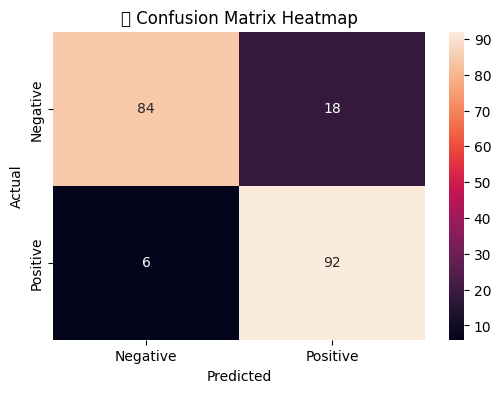

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("📊 Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ✅ Step 6.2: 3D Interactive Sentiment Clustering (with PCA + Plotly)

In [16]:
import numpy as np  # ✅ FIX: Add this if not already imported
from sklearn.decomposition import PCA
import plotly.express as px

# ✅ Handle both sparse & array cases
X_input = X_test if isinstance(X_test, np.ndarray) else X_test.toarray()

# ✅ Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_input)

# ✅ Label predictions for better visualization
predicted_labels = ['Positive' if label == 1 else 'Negative' for label in y_pred]

# ✅ Plotly 3D Interactive Chart
fig = px.scatter_3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    color=predicted_labels,
    title="🌌 3D Sentiment Space with PCA",
    labels={'color': 'Predicted Sentiment'},
    opacity=0.75
)

fig.update_layout(
    scene=dict(
        xaxis_title='🧠 PC1',
        yaxis_title='💬 PC2',
        zaxis_title='📈 PC3'
    ),
    legend=dict(title='Prediction')
)

fig.show()


# 🔥 Step 7: Animated Sentiment Heatmap Over Time (Chronological Flow)

# ✅ Step 7.1 – Prepare Sentiment Over Time (Simulated Animation Data)


In [17]:
import pandas as pd
import numpy as np

# Assume each review is one day apart for visualization
dates = pd.date_range(start="2021-01-01", periods=len(y_pred), freq='D')

# Create DataFrame
sentiment_df = pd.DataFrame({
    'Date': dates,
    'Predicted': y_pred
})

# Rolling average for smoother heatmap
sentiment_df['Smoothed'] = sentiment_df['Predicted'].rolling(window=10, min_periods=1).mean()
sentiment_df['Sentiment Label'] = sentiment_df['Smoothed'].apply(lambda x: 'Positive' if x > 0.5 else 'Negative')

sentiment_df.head()


,Date,Predicted,Smoothed,Sentiment Label
0,2021-01-01,1,1.0,Positive
1,2021-01-02,1,1.0,Positive
2,2021-01-03,1,1.0,Positive
3,2021-01-04,1,1.0,Positive
4,2021-01-05,0,0.8,Positive


from matplotlib import pyplot as plt
_df_0['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Smoothed'].plot(kind='hist', bins=20, title='Smoothed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Predicted', y='Smoothed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Predicted']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Predicted')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Smoothed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Smoothed')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Predicted']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Predicted')

from matplotlib import pyplot as plt
_df_7['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Smoothed'].plot(kind='line', figsize=(8, 4), title='Smoothed')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-18-546abb73f4fe>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




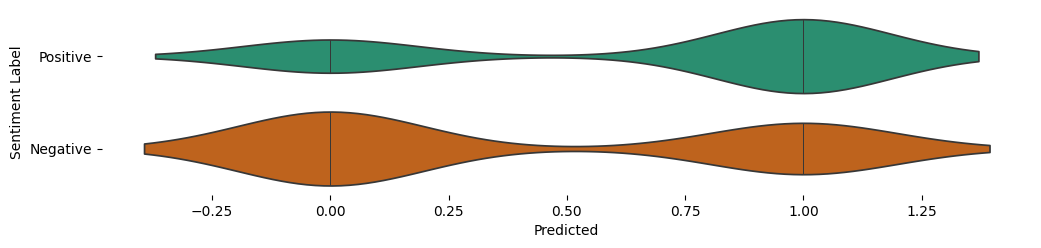

In [18]:
# @title Sentiment Label vs Predicted

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(sentiment_df['Sentiment Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(sentiment_df, x='Predicted', y='Sentiment Label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# ✅ Step 7.2 – Plot Animated Heatmap

In [19]:
import plotly.express as px

fig = px.density_heatmap(
    sentiment_df,
    x="Date",
    y="Sentiment Label",
    z="Smoothed",
    nbinsx=30,
    color_continuous_scale="bluered",
    title="🔥 Animated Sentiment Heatmap Over Time"
)

fig.update_layout(
    xaxis_title="🕒 Date",
    yaxis_title="🧠 Sentiment",
    coloraxis_colorbar=dict(title="Confidence"),
    template="plotly_dark"
)

fig.show()


# ✅ Step 8: Feature Importance — What Words Matter Most?

In [20]:
# ✅ Get feature importance
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Create a dataframe
importance_df = pd.DataFrame({
    'Word': feature_names,
    'Weight': coefficients
})

# Top + bottom 15
top_positive = importance_df.sort_values(by='Weight', ascending=False).head(15)
top_negative = importance_df.sort_values(by='Weight').head(15)

# Combine
top_words = pd.concat([top_positive, top_negative])
top_words['Sentiment'] = ['Positive']*15 + ['Negative']*15


# ✅ Step 8.2 – Hyper Chart of Word Importance

In [21]:
import plotly.express as px

fig = px.bar(
    top_words,
    x='Weight',
    y='Word',
    color='Sentiment',
    orientation='h',
    title="💡 Top Contributing Words to Sentiment Classification",
    color_discrete_map={'Positive': 'green', 'Negative': 'red'},
    template="plotly_dark"
)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


# ✅ Step 9 – Make it Personal: Sentiment Predictor Chatbot (NLP style)

In [22]:
def predict_sentiment(user_input):
    cleaned = preprocess(user_input)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    confidence = model.predict_proba(vectorized)[0][prediction]

    label = "Positive 😊" if prediction == 1 else "Negative 😞"
    print(f"🔮 Sentiment: {label} | Confidence: {confidence:.2f}")

# Try the chatbot
while True:
    user_text = input("🧠 Enter a review (or type 'exit'): ")
    if user_text.lower() == 'exit':
        break
    predict_sentiment(user_text)


🧠 Enter a review (or type 'exit'): joker
🔮 Sentiment: Positive 😊 | Confidence: 0.55
🧠 Enter a review (or type 'exit'): "Joker" is a thought-provoking psychological thriller that offers a gritty, unflinching origin story for Batman's iconic nemesis. Joaquin Phoenix delivers an extraordinary, Oscar-winning performance as Arthur Fleck, a struggling comedian whose descent into madness serves as both character study and social commentary. Director Todd Phillips creates a visually striking homage to 1970s cinema, particularly Scorsese's "Taxi Driver" and "The King of Comedy," with Gotham City reimagined as a grimy, decaying metropolis that feels like a powder keg ready to explode. The film's somber tone, desaturated color palette, and haunting score by Hildur Guðnadóttir establish an atmosphere of inescapable tension.
🔮 Sentiment: Positive 😊 | Confidence: 0.67
🧠 Enter a review (or type 'exit'): "Cosmic Catastrophe" - A Complete Waste of Time and Money Where to even begin with "Cosmic Catastr

# ✅ Final Step 10: Word Clouds for Art + Storytelling

<ipython-input-23-c93cd4cc0c78>:21: UserWarning:

Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.

<ipython-input-23-c93cd4cc0c78>:21: UserWarning:

Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.



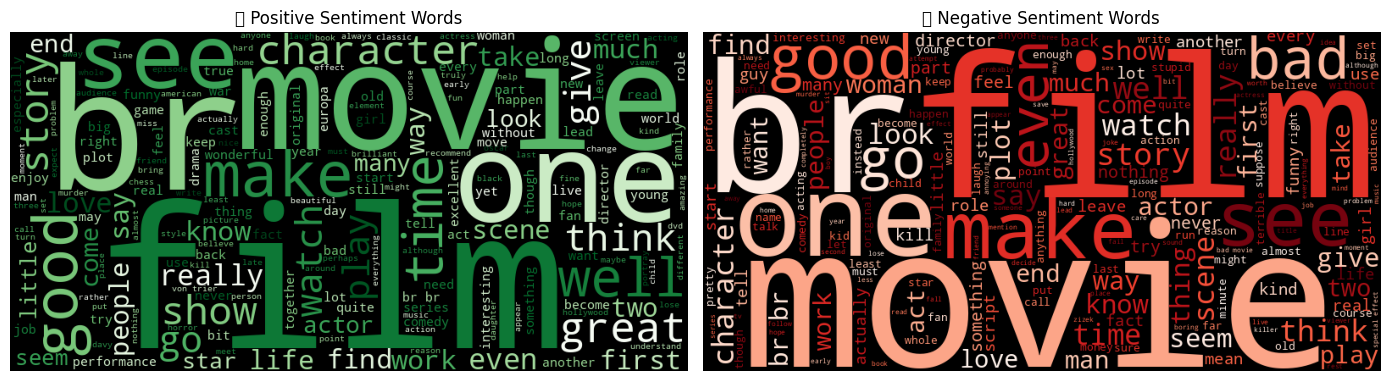

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative texts
positive_text = " ".join([cleaned_texts[i] for i in range(len(labels)) if labels[i] == 1])
negative_text = " ".join([cleaned_texts[i] for i in range(len(labels)) if labels[i] == 0])

# Word clouds
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title("🌟 Positive Sentiment Words")
plt.imshow(WordCloud(width=800, height=400, background_color='black', colormap='Greens').generate(positive_text))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("🚫 Negative Sentiment Words")
plt.imshow(WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text))
plt.axis('off')

plt.tight_layout()
plt.show()
